In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score
import torch 
from sklearn import metrics




In [8]:
# read_csv=pd.read_csv('./std.txt',sep="\s+|;|:",header=None)
# read_csv=pd.read_csv("./std_data.txt",sep="\s+|;|:",header=None)

# read_csv.to_csv ('./std_train_dia.csv')
X,y=load_svmlight_file("./std_data.txt")
# y=y.reshape(y.shape[0],1)
X=pd.DataFrame(X.toarray())

y=pd.DataFrame(y)






Test Data 


Split Data


In [9]:
def  split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test







In [11]:
class Perceptron :

    def __init__(self,X,y,epochs):
        self.epochs=epochs
        self.weights=np.array(np.random.rand(1,X.shape[1]))
       
  
        self.X=np.array(X)               
        self.y=np.array(y)
        self.lr=0.04
        self.bias=3
        self.error=[]

       

    def activation_fx(self,y):
        return np.where(y>0,1,-1)

        
    def loss_fxn(self,X,weights,y):
        signum=y*(np.dot(X,weights.T))
        
        if signum<=0:
            return 1
        else:
            return 0

    def pred_accuracy(self,X, y, weights):
        preds = np.matmul(X, weights.T)
        preds=np.where(preds>0,1,-1)
        
       
        accuracy = accuracy_score(preds,y)
        
        return preds, accuracy

    
    def train(self):
        error=[]
        for i in range(self.epochs):
            sum_of_errors=0
            
            for i in range(len(self.X)):
                sum_of_errors+=self.y[i]*self.X[i]*self.loss_fxn(self.X[i],self.weights,self.y[i])
                
            self.weights=self.weights+self.lr*(sum_of_errors)
            
            preds_train, acc_train = self.pred_accuracy(self.X,self.y, self.weights)
            self.error.append(acc_train)
            
            # print(acc_train)
                

            # for i in range(len(self.X)):
            #     # print(np.matmul(self.X[i],self.weights.T))


            #     sum_of_errors+=self.y[i]*self.X[i]*self.loss_fxn(self.X[i],self.weights,self.y[i])

                
            #     print(sum_of_errors)
            # self.weights+=self.lr*sum_of_errors
            # print(self.weights)
           
            
            
    def predict(self,X):
        if np.matmul(X,self.weights.T)>0:
            return 1
        else:
            return -1
    def get_pred(self,X):
        y_pred=np.matmul(X,self.weights.T)
        y_pred[y_pred>0]=1
        y_pred[y_pred<0]=-1

        return y_pred
            
       

       
    

    def  plot_error(self):
      
        plt.plot(b.error)
        plt.show()
        
        
           
                
        
        

            



In [12]:
X_train, X_test, y_train, y_test=split_data(X,y)



X_test.shape

(254, 8)

In [13]:
b=Perceptron(X_train,y_train,30)
b.train()





In [14]:
b.weights

array([[ -0.96952497, -10.54750984,   1.50981798,  -0.22921828,
          2.00616283,  -8.057073  ,  -1.3129521 ,  -2.00311718]])

<AxesSubplot: >

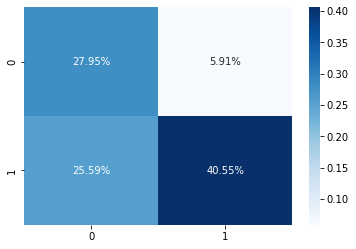

In [19]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test,b.get_pred(X_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
            

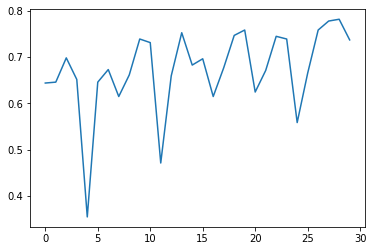

In [17]:
b.plot_error()

In [225]:
confusion_matrix(y,y_test)

array([[  0, 330],
       [  0,   0]])